In [197]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import patches as patches

In [198]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        pass
      
    return new_value 

def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y] 
   
    val_ar = [] 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
    val_ar.append(get_pixel(img, center, x-1, y)) 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    val_ar.append(get_pixel(img, center, x, y-1)) 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i]      
    return val


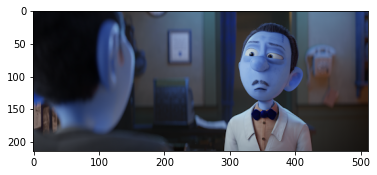

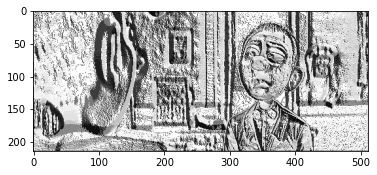

In [199]:
path = 'img.png'
img_bgr = cv2.imread(path, 1) 
   
height, width, _ = img_bgr.shape 
   
#conversion gris 
img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY) 
   
# Crée une numpy array avec meme longeur et largeur que l'image
img_lbp = np.pad(img_gray, 0, mode="edge")
   
for i in range(0, height):
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
  
plt.imshow(img_bgr) 
plt.show() 
plt.imshow(img_lbp, cmap ="gray") 
plt.show() 
   

496
26


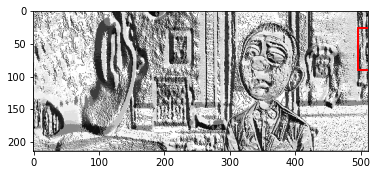

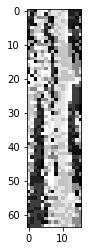

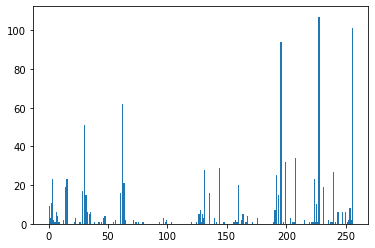

In [200]:
x = np.random.randint(0, width)
y = np.random.randint(0, height)
print(x)
print(y)
width_box = 64
height_box = 64

plt.imshow(img_lbp, cmap ="gray")
ax = plt.gca()
rect = patches.Rectangle((x,y),
                 width_box,
                 height_box,
                 linewidth=2,
                 edgecolor='red',
                 fill = False)

ax.add_patch(rect)
plt.show()

img_crop = img_lbp[y:y+height_box, x:x+width_box]
plt.imshow(img_crop, cmap ="gray") 
plt.show()


plt.hist(img_crop.ravel(),256,[0,256])
plt.show()